<a href="https://colab.research.google.com/github/esraasayed98/Practice_DL/blob/main/02_CIFAR_10_with_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# visualize images

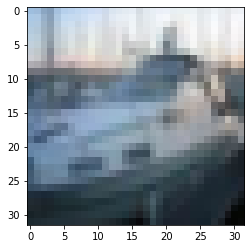

In [ ]:
img = test_images[2]
plt.imshow(img)

Images for class number 0


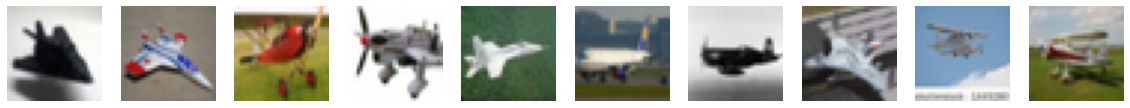

Images for class number 1


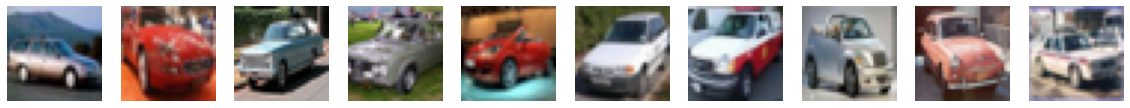

Images for class number 2


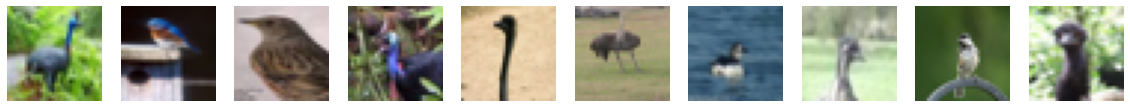

Images for class number 3


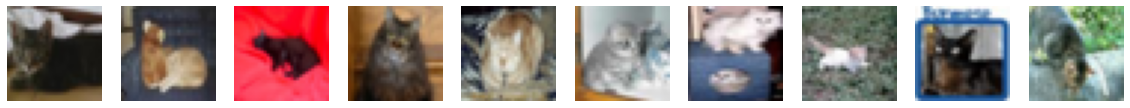

Images for class number 4


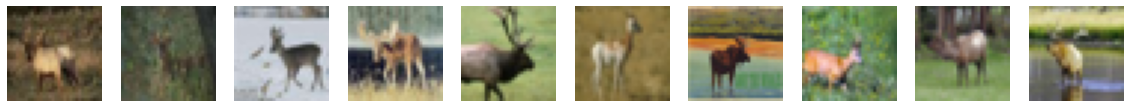

Images for class number 5


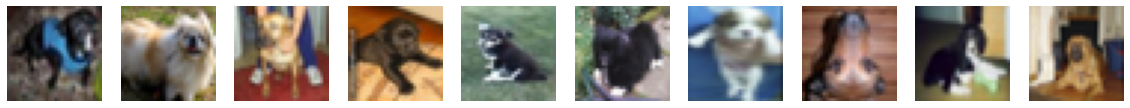

Images for class number 6


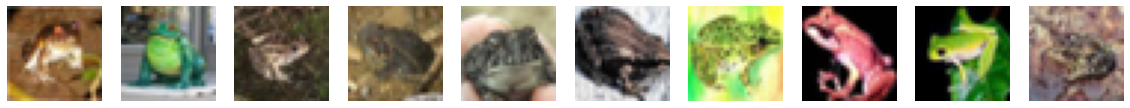

Images for class number 7


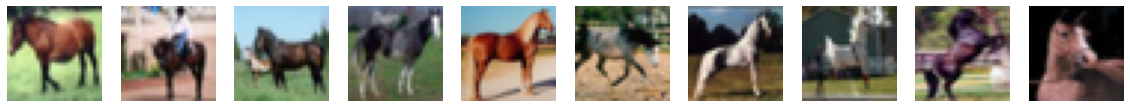

Images for class number 8


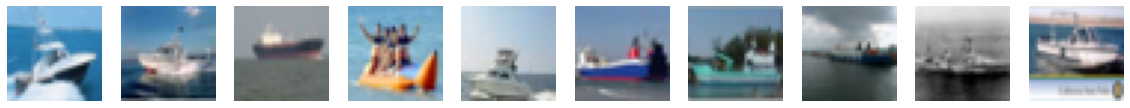

Images for class number 9


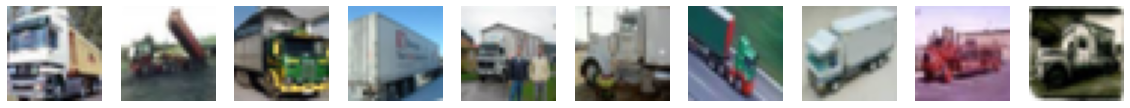

In [ ]:
for i in range(10):
  n = 0
  print("Images for class number {}".format(i))
  fig, axs = plt.subplots(1,10, figsize=(20,20))
  for j in range(len(train_labels)):
    if n > 9 :
      break
    else:
      if train_labels[j][0] == i:
        axs[n].imshow(train_images[j].reshape((32,32,3)))
        axs[n].axis('off')
        n+=1
  plt.show()

# Plot a histogram of number of examples per class in the training and test sets

In [ ]:
# number of examples in the testing set
df = pd.DataFrame()
df['label']=np.unique(train_labels)
df['train_count']=np.array(pd.DataFrame(train_labels).value_counts())
df['test_count']=np.array(pd.DataFrame(test_labels).value_counts())
df.head()

,label,train_count,test_count
0,0,5000,1000
1,1,5000,1000
2,2,5000,1000
3,3,5000,1000
4,4,5000,1000


In [ ]:
import plotly.express as px
px.bar(x=df["label"], y=df['train_count'], labels={'x':'Labels', 'y':'count'}, color=df["label"], title="Number of examples in Train set")


In [ ]:
px.bar(x=df["label"], y=df['test_count'], labels={'x':'Labels', 'y':'count'}, color=df["label"], title="Number of examples in Test set")


# Reshape data

In [ ]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

# one hot encoding to labels

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape

(50000, 10)

In [ ]:
test_labels.shape

(10000, 10)

# Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True, stratify=train_labels)

# Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

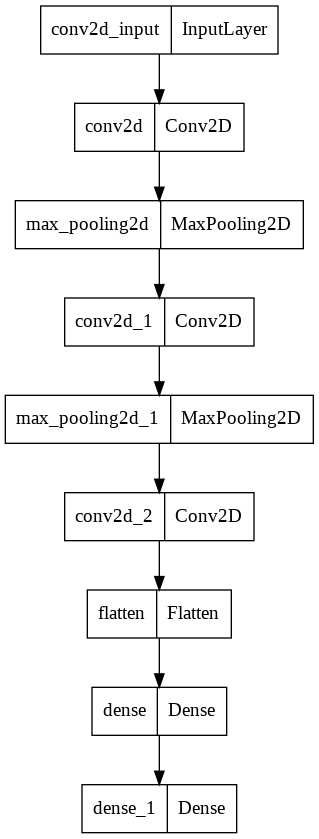

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=100, batch_size=12)

Epoch 1/100
4167/4167 [==============================] - 26s 6ms/step - loss: 1.7249 - accuracy: 0.3742
Epoch 2/100
4167/4167 [==============================] - 24s 6ms/step - loss: 1.4197 - accuracy: 0.4915
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 1.3044 - accuracy: 0.5390
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 1.2185 - accuracy: 0.5713
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 1.1496 - accuracy: 0.5971
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 1.0912 - accuracy: 0.6189
Epoch 7/100
4167/4167 [==============================] - 16s 4ms/step - loss: 1.0439 - accuracy: 0.6364
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 1.0010 - accuracy: 0.6529
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.9647 - accuracy: 0.6641
Epoch 10/100
4167/4167 [==============================] - 15s 4m

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.6105 - accuracy: 0.6946


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.694599986076355


# try with validation 

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=12, validation_data=(x_val, y_val))

Epoch 1/100
3334/3334 [==============================] - 15s 4ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0494 - val_accuracy: 0.9824
Epoch 2/100
3334/3334 [==============================] - 14s 4ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 3/100
3334/3334 [==============================] - 15s 4ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0579 - val_accuracy: 0.9791
Epoch 4/100
3334/3334 [==============================] - 15s 4ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0846 - val_accuracy: 0.9690
Epoch 5/100
3334/3334 [==============================] - 14s 4ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0489 - val_accuracy: 0.9842
Epoch 6/100
3334/3334 [==============================] - 14s 4ms/step - loss: 0.0299 - accuracy: 0.9911 - val_loss: 0.0497 - val_accuracy: 0.9826
Epoch 7/100
3334/3334 [==============================] - 14s 4ms/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: 0.0686 -

# training loss vs. validation loss over the number of epochs

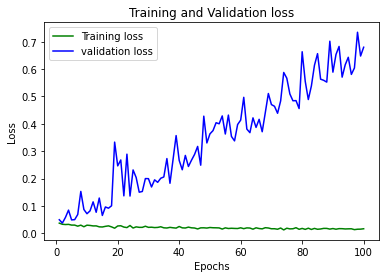

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# test model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 3.8829 - accuracy: 0.6851


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.6851000189781189
